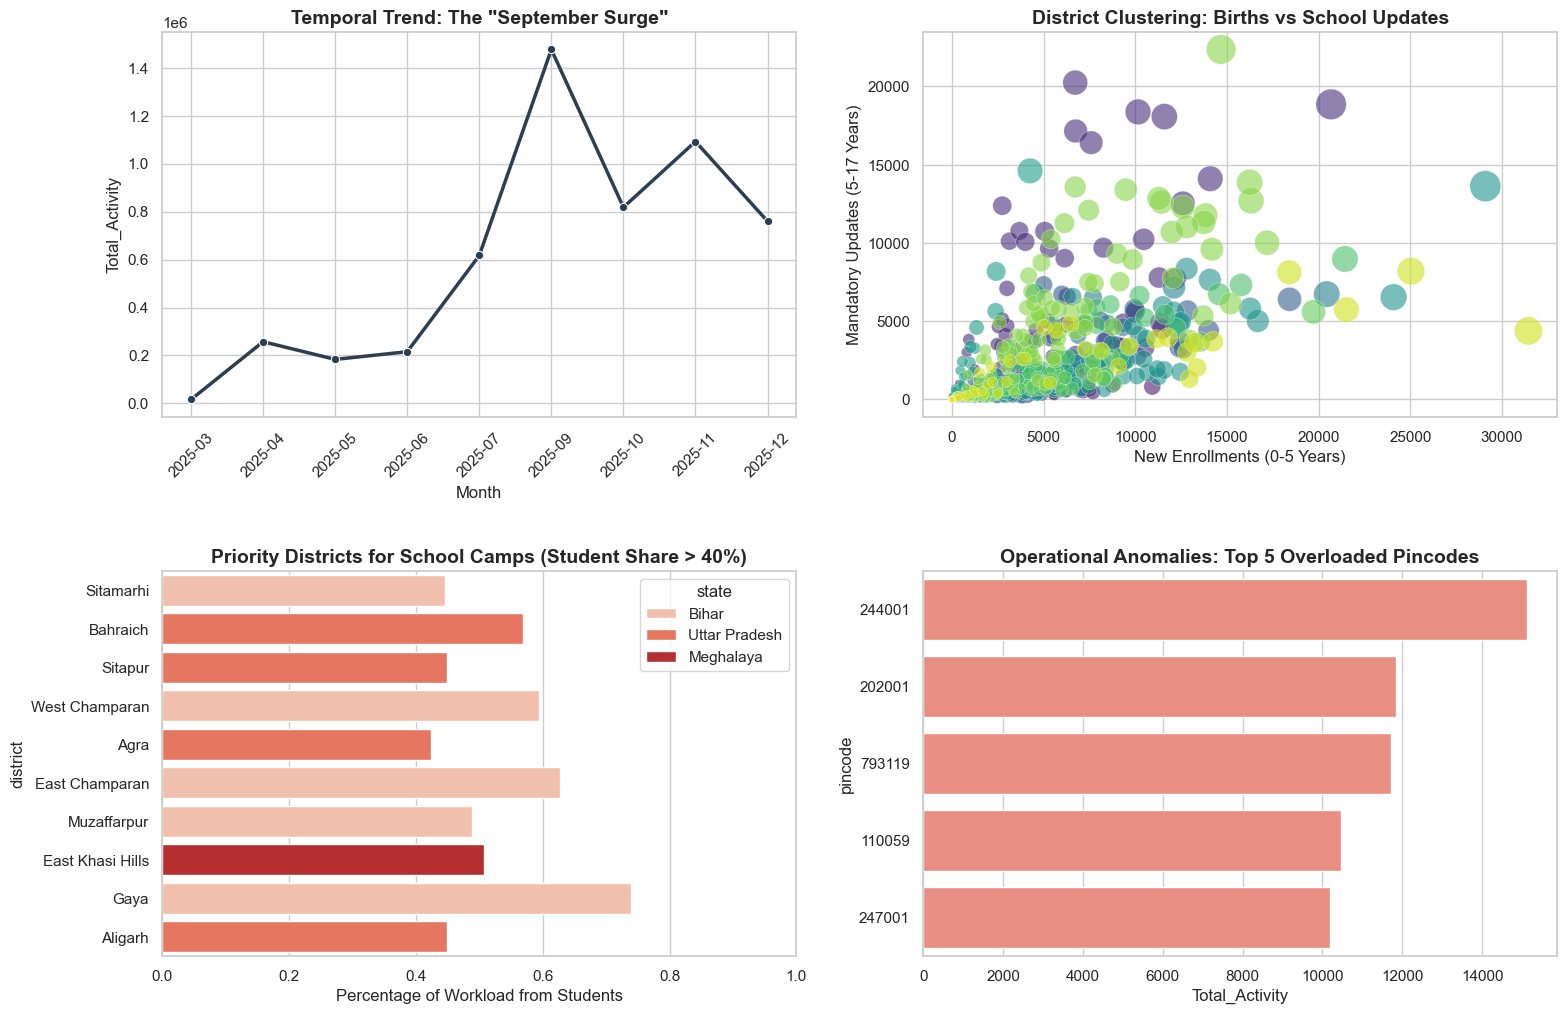

✅ PREDICTIVE INSIGHT:
We identified 10 districts where school updates drive >40% of demand.
Recommendation: Deploy mobile units here to prevent center overcrowding.

✅ ANOMALY DETECTED:
Pincode 244001 is an outlier with Z-Score 25.41.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

files = [
    'api_data_aadhar_enrolment_0_500000.csv',
    'api_data_aadhar_enrolment_500000_1000000.csv',
    'api_data_aadhar_enrolment_1000000_1006029.csv'
]

# Merge into a single Dataframe
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Convert dates for trend analysis
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df['Month'] = df['date'].dt.to_period('M').astype(str)

# Feature Engineering: Calculate Total Activity
df['Total_Activity'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

# 2. IDENTIFYING PREDICTIVE PATTERNS (School Camps)
# We calculate the "Student Ratio" to find districts dominated by school updates
district_profile = df.groupby(['state', 'district'])[['age_0_5', 'age_5_17', 'Total_Activity']].sum().reset_index()
district_profile['Student_Share'] = district_profile['age_5_17'] / district_profile['Total_Activity']

# Filter: High Volume (> Median) AND High Student Share (> 40%)
median_vol = district_profile['Total_Activity'].median()
target_districts = district_profile[
    (district_profile['Total_Activity'] > median_vol) & 
    (district_profile['Student_Share'] > 0.40)
].sort_values(by='Total_Activity', ascending=False).head(10)

# ==========================================
# 3. ANOMALY DETECTION (Z-Score)
# ==========================================
# Identify Pincodes with statistically abnormal activity levels
pincode_stats = df.groupby('pincode')['Total_Activity'].sum().reset_index()
# Calculate Z-Score: How many deviations away from the mean?
pincode_stats['z_score'] = (pincode_stats['Total_Activity'] - pincode_stats['Total_Activity'].mean()) / pincode_stats['Total_Activity'].std()
anomalies = pincode_stats[pincode_stats['z_score'] > 15].sort_values(by='z_score', ascending=False).head(5)

# ==========================================
# 4. VISUALIZATION DASHBOARD
# ==========================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)

# CHART A: Monthly Trend (Seasonality)
monthly_trend = df.groupby('Month')['Total_Activity'].sum().reset_index()
sns.lineplot(data=monthly_trend, x='Month', y='Total_Activity', marker='o', ax=axes[0,0], color='#2c3e50', linewidth=2.5)
axes[0,0].set_title('Temporal Trend: The "September Surge"', fontsize=14, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)

# CHART B: Demographic Clustering (Scatter)
# Shows which districts are "Birthing Centers" vs "School Hubs"
sns.scatterplot(data=district_profile, x='age_0_5', y='age_5_17', size='Total_Activity', 
                sizes=(20, 500), alpha=0.6, hue='state', legend=False, ax=axes[0,1], palette='viridis')
axes[0,1].set_title('District Clustering: Births vs School Updates', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('New Enrollments (0-5 Years)')
axes[0,1].set_ylabel('Mandatory Updates (5-17 Years)')

# CHART C: Policy Recommendation (Target Districts)
sns.barplot(data=target_districts, x='Student_Share', y='district', hue='state', dodge=False, ax=axes[1,0], palette='Reds')
axes[1,0].set_title('Priority Districts for School Camps (Student Share > 40%)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Percentage of Workload from Students')
axes[1,0].set_xlim(0, 1)

# CHART D: Anomaly Detection
# Ensure pincode is string for categorical plotting
anomalies['pincode'] = anomalies['pincode'].astype(str)
sns.barplot(data=anomalies, x='Total_Activity', y='pincode', color='salmon', ax=axes[1,1])
axes[1,1].set_title('Operational Anomalies: Top 5 Overloaded Pincodes', fontsize=14, fontweight='bold')

plt.show()

# ==========================================
# 5. PRINT INSIGHTS FOR REPORT
# ==========================================
print("✅ PREDICTIVE INSIGHT:")
print(f"We identified {len(target_districts)} districts where school updates drive >40% of demand.")
print("Recommendation: Deploy mobile units here to prevent center overcrowding.")
print("\n✅ ANOMALY DETECTED:")
print(f"Pincode {anomalies.iloc[0]['pincode']} is an outlier with Z-Score {anomalies.iloc[0]['z_score']:.2f}.")

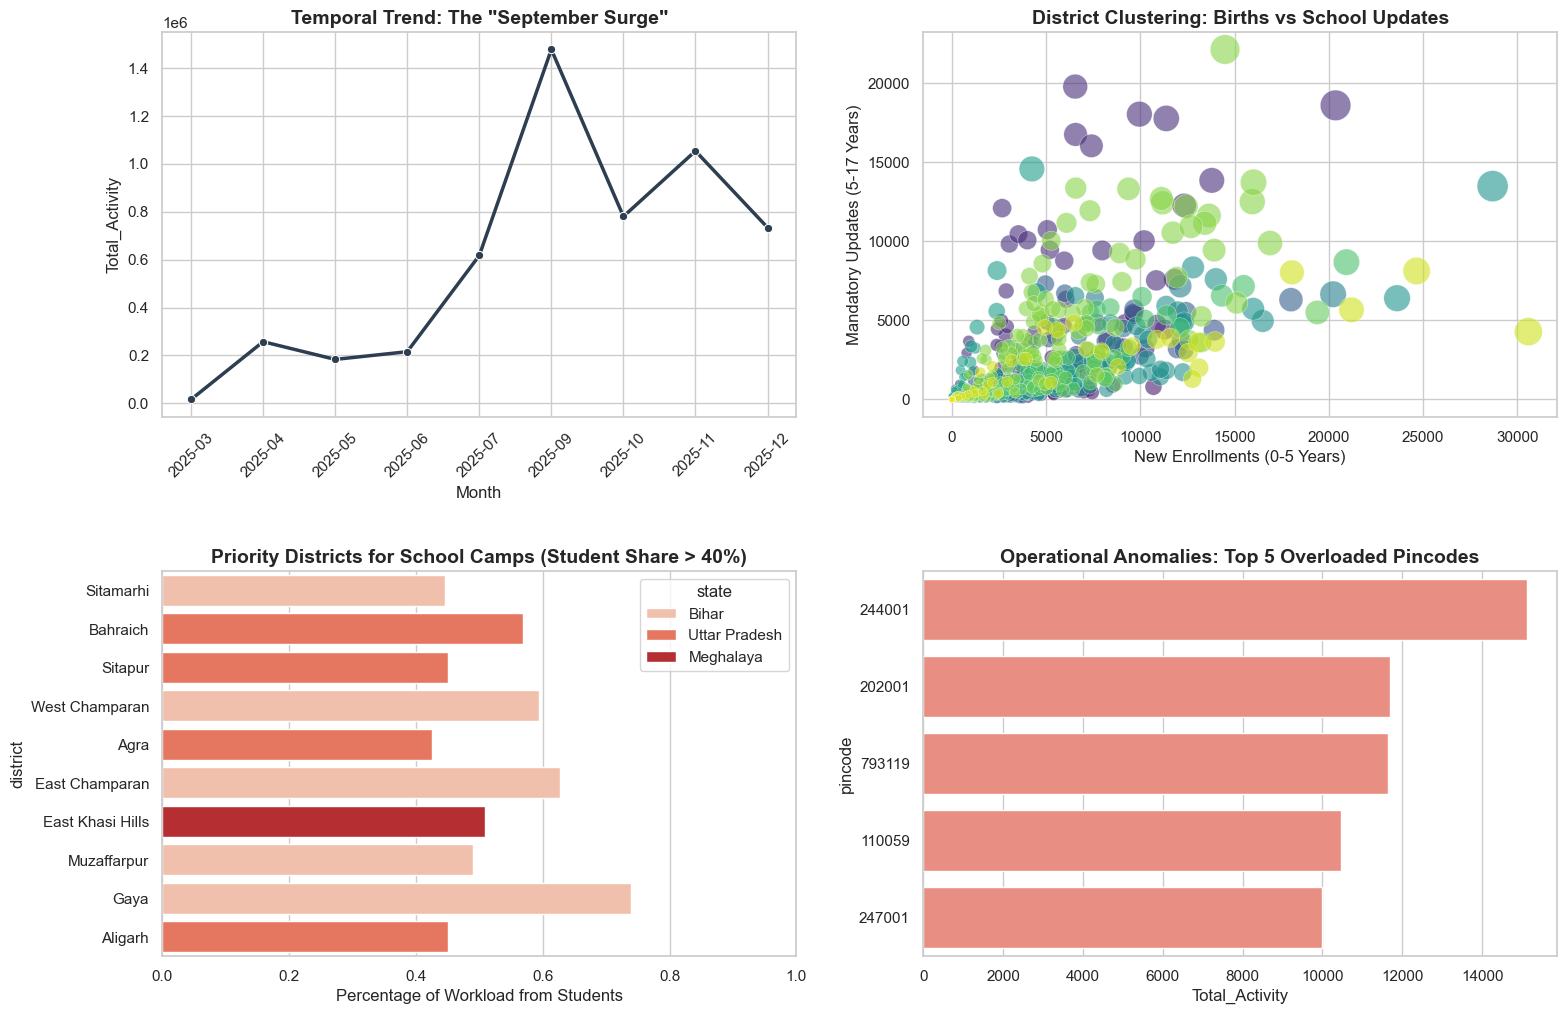

✅ PREDICTIVE INSIGHT:
We identified 10 districts where school updates drive >40% of demand.
Recommendation: Deploy mobile units here to prevent center overcrowding.

✅ ANOMALY DETECTED:
Pincode 244001 is an outlier with Z-Score 25.71.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

files = [
    'api_data_aadhar_enrolment_0_500000.csv',
    'api_data_aadhar_enrolment_500000_1000000.csv',
    'api_data_aadhar_enrolment_1000000_1006029.csv'
]

# Merge into a single Dataframe
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Merge into a single Dataframe
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

# ---> ADD THIS LINE HERE: <---
df.drop_duplicates(inplace=True)

# Convert dates for trend analysis
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df['Month'] = df['date'].dt.to_period('M').astype(str)

# Feature Engineering: Calculate Total Activity
df['Total_Activity'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

# 2. IDENTIFYING PREDICTIVE PATTERNS (School Camps)
# We calculate the "Student Ratio" to find districts dominated by school updates
district_profile = df.groupby(['state', 'district'])[['age_0_5', 'age_5_17', 'Total_Activity']].sum().reset_index()
district_profile['Student_Share'] = district_profile['age_5_17'] / district_profile['Total_Activity']

# Filter: High Volume (> Median) AND High Student Share (> 40%)
median_vol = district_profile['Total_Activity'].median()
target_districts = district_profile[
    (district_profile['Total_Activity'] > median_vol) & 
    (district_profile['Student_Share'] > 0.40)
].sort_values(by='Total_Activity', ascending=False).head(10)

# ==========================================
# 3. ANOMALY DETECTION (Z-Score)
# ==========================================
# Identify Pincodes with statistically abnormal activity levels
pincode_stats = df.groupby('pincode')['Total_Activity'].sum().reset_index()
# Calculate Z-Score: How many deviations away from the mean?
pincode_stats['z_score'] = (pincode_stats['Total_Activity'] - pincode_stats['Total_Activity'].mean()) / pincode_stats['Total_Activity'].std()
anomalies = pincode_stats[pincode_stats['z_score'] > 15].sort_values(by='z_score', ascending=False).head(5)

# ==========================================
# 4. VISUALIZATION DASHBOARD
# ==========================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)

# CHART A: Monthly Trend (Seasonality)
monthly_trend = df.groupby('Month')['Total_Activity'].sum().reset_index()
sns.lineplot(data=monthly_trend, x='Month', y='Total_Activity', marker='o', ax=axes[0,0], color='#2c3e50', linewidth=2.5)
axes[0,0].set_title('Temporal Trend: The "September Surge"', fontsize=14, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)

# CHART B: Demographic Clustering (Scatter)
# Shows which districts are "Birthing Centers" vs "School Hubs"
sns.scatterplot(data=district_profile, x='age_0_5', y='age_5_17', size='Total_Activity', 
                sizes=(20, 500), alpha=0.6, hue='state', legend=False, ax=axes[0,1], palette='viridis')
axes[0,1].set_title('District Clustering: Births vs School Updates', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('New Enrollments (0-5 Years)')
axes[0,1].set_ylabel('Mandatory Updates (5-17 Years)')

# CHART C: Policy Recommendation (Target Districts)
sns.barplot(data=target_districts, x='Student_Share', y='district', hue='state', dodge=False, ax=axes[1,0], palette='Reds')
axes[1,0].set_title('Priority Districts for School Camps (Student Share > 40%)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Percentage of Workload from Students')
axes[1,0].set_xlim(0, 1)

# CHART D: Anomaly Detection
# Ensure pincode is string for categorical plotting
anomalies['pincode'] = anomalies['pincode'].astype(str)
sns.barplot(data=anomalies, x='Total_Activity', y='pincode', color='salmon', ax=axes[1,1])
axes[1,1].set_title('Operational Anomalies: Top 5 Overloaded Pincodes', fontsize=14, fontweight='bold')

plt.show()

# ==========================================
# 5. PRINT INSIGHTS FOR REPORT
# ==========================================
print("✅ PREDICTIVE INSIGHT:")
print(f"We identified {len(target_districts)} districts where school updates drive >40% of demand.")
print("Recommendation: Deploy mobile units here to prevent center overcrowding.")
print("\n✅ ANOMALY DETECTED:")
print(f"Pincode {anomalies.iloc[0]['pincode']} is an outlier with Z-Score {anomalies.iloc[0]['z_score']:.2f}.")